# Supplemental Figure S3: Diversity of two-way junctions

# Setup

## imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from dms_3d_features.plotting import *

## extra functions

## load data

In [1]:
DATA_PATH = "../../data"
REVISION_PATH = "../../data/revisions"

In [3]:
df_res = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")

df_st_1 = pd.read_csv(f"{DATA_PATH}/csvs/Supplemental_Table_S1.csv")
df_st_1["description"] = df_st_1["description"].str.lower()

# Plotting

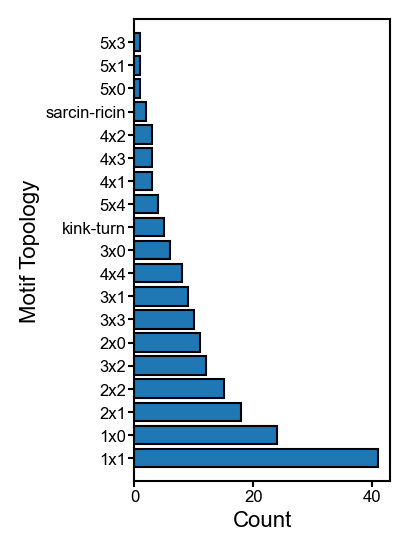

In [4]:
motif_description = {}
for i, row in df_st_1.iterrows():
    motif_description[row["sequence"]] = row["description"]
df_1 = df_res[df_res["pdb_path"].apply(lambda x: len(x) > 0)].copy()
df_unique = df_1.drop_duplicates(subset=["m_sequence"]).copy()
for i, row in df_unique.iterrows():
    if row["m_sequence"] not in motif_description:
        continue
    if "kink" in motif_description[row["m_sequence"]]:
        df_unique.loc[i, "m_token"] = "kink-turn"
    elif "sarcin" in motif_description[row["m_sequence"]]:
        df_unique.loc[i, "m_token"] = "sarcin-ricin"

unique_m_tokens = df_unique["m_token"].unique()
m_token_counts = (
    df_unique.groupby("m_token")["m_sequence"]
    .nunique()
    .reset_index()
    .rename(columns={"m_sequence": "count"})
)
m_token_counts = m_token_counts.sort_values(by="count", ascending=False)

fig, ax = plt.subplots(figsize=(1.65, 3), dpi=200)
bars = ax.barh(
    m_token_counts["m_token"],
    m_token_counts["count"],
    edgecolor="black",
    linewidth=0.75,
)
ax.set_yticks(range(len(m_token_counts)))
ax.set_yticklabels(m_token_counts["m_token"])
ax.set_xlabel("Count", labelpad=2)
ax.set_ylabel("Motif Topology", labelpad=2)
ax.set_ylim([-1, len(m_token_counts)])
publication_style_ax(ax)
fig.savefig(
    "../../figures/supplemental_figures/supplemental_figure_s3.png",
    dpi=600,
    bbox_inches="tight",
)